In [77]:
# Let's have a bayesien look on the male/female classification problem
import matplotlib.pyplot as plt
import numpy as np

# Number of generated data points.
N = 50

x_1 = np.random.normal(165, 5, N) # Measurements from the class 1
x_2 = np.random.normal(180, 6, N) # Measurements from the class 2

In [79]:
# Kernel estimation code from probability distribution notebook.

def kernel_estimation(kernel_width_x10):
    x = np.arange(100, 200, 1)
    
    # Output value is Gaussian kernel multiplied by all positive samples
    yval1 = np.zeros(len(x))
    for xind, xval in enumerate(x):
        yval1[xind] = sum(stats.norm.pdf(x_1, xval, kernel_width_x10 / 10))
    yval2 = np.zeros(len(x))
    for xind, xval in enumerate(x):
        yval2[xind] = sum(stats.norm.pdf(x_2, xval, kernel_width_x10 / 10))

    # We normalize values to sum one (this is ad hoc)
    plt.plot(x, yval1/sum(yval1),'r-')
    plt.plot(x, yval2/sum(yval2),'g-')

    # For comparison let's also print Gaussians
    mu1 = np.mean(x_1)
    mu2 = np.mean(x_2)
    sigma1 = np.std(x_1)
    sigma2 = np.std(x_2)
    
    
    print('Measurement 1')
    print('Value of mean gives highest product of normal pdf:', x[np.argmax(yval1, axis=0)])
    print('Emperical mean:', mu1)
    
    print()
    print('Measurement 2')
    print('Value of mean gives highest product of normal pdf:', x[np.argmax(yval2, axis=0)])
    print('Emperical mean:', mu2)

    
    x = np.arange(100, 200, 1)
        
    plt.plot(x, stats.norm.pdf(x, mu1, sigma1),'r--', label='Measurement 1 - Biased variance')
    plt.plot(x, stats.norm.pdf(x, mu2, sigma2),'g--', label='Measurement 2 - Biased variance')
    
    plt.plot(x, stats.norm.pdf(x, mu1, np.sqrt(N / (N - 1) * sigma1)), label='Measurement 1 - Unbiased variance')
    plt.plot(x, stats.norm.pdf(x, mu2, np.sqrt(N / (N - 1) * sigma2)), label='Measurement 2 - Unbiased variance')
    
    plt.legend()

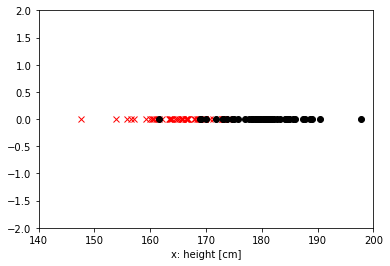

Values on slider are kernel width multply with 10.


interactive(children=(IntSlider(value=25, description='kernel_width_x10', max=50), Output()), _dom_classes=('w…

<function __main__.kernel_estimation(kernel_width_x10)>

In [81]:
import scipy.stats as stats
from ipywidgets import interact
%matplotlib inline

# Plot data generated.
plt.xlabel('x: height [cm]')
plt.axis([140, 200, -2, 2])

plt.plot(x_1,np.zeros(len(x_1)),'rx')
plt.plot(x_2,np.zeros(len(x_2)),'ko')
plt.show()


# Try many values of the kernel width
print('Values on slider are kernel width multply with 10.')
interact(kernel_estimation, kernel_width_x10=(0, 50))

When experiments, value of kerel with about 3 would be most fit to my data.